In [2]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 3.9 MB/s eta 0:00:0000:0100:01


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load the Dataset

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 47s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
# gives all the jpg data which is under data_dir directory
list(data_dir.glob("*/*.jpg"))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

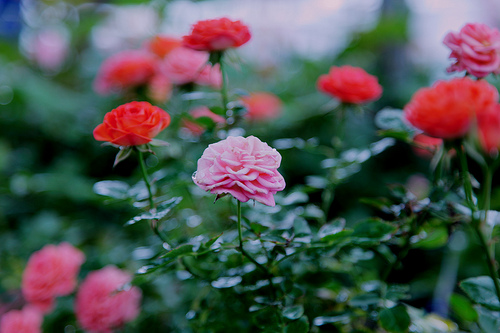

In [11]:
PIL.Image.open(str(roses[1]))

In [12]:
tulips = list(data_dir.glob("tulips/*"))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

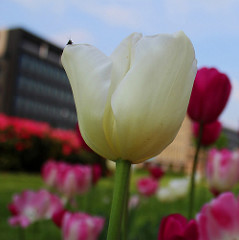

In [13]:
PIL.Image.open(str(tulips[1]))

## Read Flowers Images from Disk into Numpy Array using OpenCV

In [26]:
flowers_images_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [27]:
flowers_labels_dict = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [28]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [29]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [30]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [31]:
img.shape

(243, 500, 3)

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [36]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [38]:
len(X_train)

2752

In [39]:
len(X_test)

918

## Preprocessing: Scale Images

In [40]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Build Convolutional Model

In [42]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=30)

Metal device set to: Apple M1


2023-01-24 10:17:34.851409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-24 10:17:34.851853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2023-01-24 10:17:36.730709: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-24 10:17:37.147322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 7s 59ms/step - loss: 1.4071 - accuracy: 0.3924
Epoch 2/30
86/86 [==============================] - 5s 59ms/step - loss: 1.0486 - accuracy: 0.5919
Epoch 3/30
86/86 [==============================] - 5s 59ms/step - loss: 0.8760 - accuracy: 0.6733
Epoch 4/30
86/86 [==============================] - 5s 60ms/step - loss: 0.6532 - accuracy: 0.7591
Epoch 5/30
86/86 [==============================] - 5s 59ms/step - loss: 0.4373 - accuracy: 0.8477
Epoch 6/30
86/86 [==============================] - 5s 59ms/step - loss: 0.2625 - accuracy: 0.9102
Epoch 7/30
86/86 [==============================] - 5s 58ms/step - loss: 0.1296 - accuracy: 0.9600
Epoch 8/30
86/86 [==============================] - 5s 59ms/step - loss: 0.0652 - accuracy: 0.9833
Epoch 9/30
86/86 [==============================] - 5s 59ms/step - loss: 0.0661 - accuracy: 0.9844
Epoch 10/30
86/86 [==============================] - 5s 59ms/step - loss: 0.0375 - accuracy: 0.9891
Epoch 11/30
86/86 [=

In [43]:
model.evaluate(X_test_scaled, y_test)

 6/29 [=====>........................] - ETA: 0s - loss: 3.1066 - accuracy: 0.6354

2023-01-24 10:20:12.185986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 30ms/step - loss: 2.8314 - accuracy: 0.6612


[2.8314077854156494, 0.6612200140953064]

In [45]:
# Here we see that while train accuracy is very high (100%),
#the test accuracy is significantly low (66.12%) indicating overfitting. 
#Let's make some predictions before we use data augmentation to address overfitting

In [44]:
predictions = model.predict(X_test_scaled)
predictions

10/29 [=========>....................] - ETA: 0s

2023-01-24 10:20:13.663018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 21ms/step


array([[-7.5432010e+00,  1.3585249e+01,  3.5161822e+00, -9.6235905e+00,
        -5.8037567e+00],
       [ 9.1386862e+00, -1.8371327e+00, -4.4785848e+00, -4.5660534e+00,
        -2.2634986e-01],
       [ 1.9707711e+00, -8.9520426e+00,  1.3229409e+01, -5.8745284e+00,
        -7.6488533e+00],
       ...,
       [-9.8328676e+00, -4.7051315e+00, -1.9446466e+00,  1.1037220e+01,
        -3.6031530e+00],
       [ 3.0820887e+00, -5.9175363e+00, -2.0625722e+00, -1.6362043e-02,
        -3.7404528e-01],
       [-9.5695925e+00, -1.6065531e+01, -6.3361382e+00,  2.1840698e+01,
         3.5540297e+00]], dtype=float32)

In [46]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.6682543e-10, 9.9995768e-01, 4.2368323e-05, 8.3274311e-11,
       3.7970262e-09], dtype=float32)>

In [47]:
np.argmax(score)

1

In [48]:
y_test[0]

1

# Improve Test Accuracy Using Data Augmentation

In [80]:
# since I have M1 processor I've added 'with tf.device('/cpu:0')'
with tf.device('/cpu:0'):
    data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    ])

### Original Image

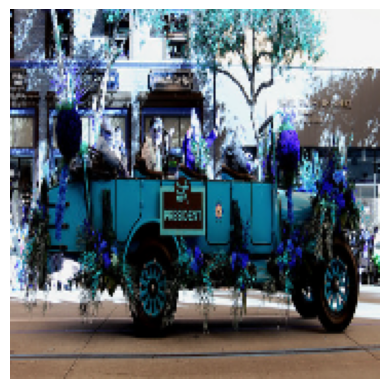

In [81]:
plt.axis("off")
plt.imshow(X[0])

### Newly generated training sample using data augmentation

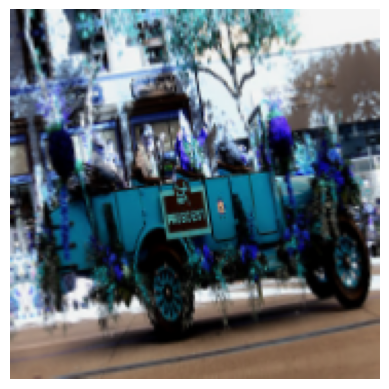

In [82]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the Model using Data Augmentation and a Dropout Layer

In [ ]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2023-01-24 15:27:54.760576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 13s 137ms/step - loss: 1.3480 - accuracy: 0.4262
Epoch 2/30
86/86 [==============================] - 12s 135ms/step - loss: 1.1007 - accuracy: 0.5600
Epoch 3/30
86/86 [==============================] - 12s 141ms/step - loss: 0.9522 - accuracy: 0.6450
Epoch 4/30
86/86 [==============================] - 12s 137ms/step - loss: 0.8899 - accuracy: 0.6562
Epoch 5/30
86/86 [==============================] - 12s 135ms/step - loss: 0.8184 - accuracy: 0.6908
Epoch 6/30
86/86 [==============================] - 12s 134ms/step - loss: 0.7681 - accuracy: 0.7002
Epoch 7/30
86/86 [==============================] - 12s 135ms/step - loss: 0.7399 - accuracy: 0.7304
Epoch 8/30
86/86 [==============================] - 12s 136ms/step - loss: 0.6921 - accuracy: 0.7409
Epoch 9/30
86/86 [==============================] - 12s 135ms/step - loss: 0.6379 - accuracy: 0.7634
Epoch 10/30
86/86 [==============================] - 12s 141ms/step - loss: 0.6315 - accuracy: 0.7653


In [ ]:
model.evaluate(X_test_scaled,y_test)